In [113]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [114]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [115]:
batch_size = 32

In [116]:
training_set = train_datagen.flow_from_directory(r"D:\research\archive\dataset2\train",
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r"D:\research\archive\dataset2\test",
                                            target_size = (64, 64),
                                            batch_size = batch_size//2,
                                            class_mode = 'categorical')

Found 22734 images belonging to 164 classes.
Found 5678 images belonging to 164 classes.


In [117]:
h=[]

In [118]:
c1=Sequential([
    Conv2D(filters=32,kernel_size=3,strides=(1,1), input_shape=(64,64,3), padding='same', activation = 'LeakyReLU'),
    MaxPooling2D(pool_size=(3,3)),# pool size
    Conv2D(filters=64,kernel_size=(3),strides=1,padding='same',activation='LeakyReLU'),
    MaxPooling2D(pool_size=(3,3)),
    Conv2D(filters=124,kernel_size=(3),strides=1,padding='same',activation='LeakyReLU'),
    MaxPooling2D(pool_size=(3,3)),
    Flatten(),
    Dense(units = 512 , activation = 'LeakyReLU'),
    Dense(units = 256 , activation = 'LeakyReLU'),
    Dense(units = 164 , activation = 'softmax')#(sigmoid,log loss
    
])
c1.compile( optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy','mse','categorical_accuracy','AUC'])#optimizer="SGD",
h.append(c1)

In [119]:
c2=Sequential([
    Conv2D(filters=32,kernel_size=3,strides=(1,1), input_shape=(64,64,3), padding='same', activation = 'LeakyReLU'),
    MaxPooling2D(pool_size=(3,3)),# pool size
    Conv2D(filters=64,kernel_size=(3),strides=1,padding='same',activation='LeakyReLU'),
    MaxPooling2D(pool_size=(3,3)),
    Conv2D(filters=124,kernel_size=(3),strides=1,padding='same',activation='LeakyReLU'),
    MaxPooling2D(pool_size=(3,3)),
    Flatten(),
    Dense(units = 512 , activation = 'LeakyReLU'),
    Dense(units = 256 , activation = 'LeakyReLU'),
    Dense(units = 164 , activation = 'sigmoid')#(sigmoid,log loss
    
])
c2.compile( optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy','mse','categorical_accuracy','AUC'])
h.append(c2)

In [120]:
c3=Sequential([
    Conv2D(filters=32,kernel_size=3,strides=(1,1), input_shape=(64,64,3), padding='same', activation = 'LeakyReLU'),
    MaxPooling2D(pool_size=(3,3)),
    Conv2D(filters=64,kernel_size=(3),strides=1,padding='same',activation='LeakyReLU'),
    MaxPooling2D(pool_size=(3,3)),
    Conv2D(filters=124,kernel_size=(3),strides=1,padding='same',activation='LeakyReLU'),
    MaxPooling2D(pool_size=(3,3)),
    Flatten(),
    Dense(units = 512 , activation = 'LeakyReLU'),
    Dense(units = 256 , activation = 'LeakyReLU'),
    Dense(units = 164 , activation = 'sigmoid')#sigmoid from softmax
    
])
c3.compile( optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy','mse','categorical_accuracy','AUC'])
h.append(c3)

In [121]:
c4=Sequential([
    Conv2D(filters=32,kernel_size=3,strides=(1,1), input_shape=(64,64,3), padding='same', activation = 'tanh'),
    MaxPooling2D(pool_size=(3,3)),
    Conv2D(filters=64,kernel_size=(3),strides=1,padding='same',activation='tanh'),
    MaxPooling2D(pool_size=(3,3)),
    Conv2D(filters=124,kernel_size=(3),strides=1,padding='same',activation='tanh'),#tanh
    MaxPooling2D(pool_size=(3,3)),
    Flatten(),
    Dense(units = 512 , activation = 'LeakyReLU'),
    Dense(units = 256 , activation = 'LeakyReLU'),
    Dense(units = 164 , activation = 'softmax')
    
])
c4.compile( optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy','mse','categorical_accuracy','AUC'])
h.append(c4)

In [122]:
ff3=[]
ff3.append(h)

In [123]:
ff3

[[<keras.engine.sequential.Sequential at 0x1b307bcd5d0>,

In [124]:

j=1

lst1=[]
for lists in ff3:

  print("lists"+str(j))
  i=1
  mdl=[]
  for model in lists:

    print('Model'+str(i))
    f=model.fit(training_set,
              steps_per_epoch = 711,
              epochs = 30
              #,validation_data=(test_set)
                    )
    s=model.summary()
    e=model.evaluate(test_set)
    mdl.append([f,s,e])


    i+=1
  lst1.append(mdl)
  
  j+=1

lists1
Model1
Epoch 1/30
711/711 [==============================] - 352s 494ms/step - loss: 4.8534 - accuracy: 0.0250 - mse: 0.0060 - categorical_accuracy: 0.0250 - auc: 0.6590
Epoch 2/30
711/711 [==============================] - 72s 101ms/step - loss: 4.2941 - accuracy: 0.0756 - mse: 0.0059 - categorical_accuracy: 0.0756 - auc: 0.7947
Epoch 3/30
711/711 [==============================] - 306s 431ms/step - loss: 3.8194 - accuracy: 0.1408 - mse: 0.0058 - categorical_accuracy: 0.1408 - auc: 0.8513
Epoch 4/30
711/711 [==============================] - 82s 116ms/step - loss: 3.3869 - accuracy: 0.2175 - mse: 0.0055 - categorical_accuracy: 0.2175 - auc: 0.8858
Epoch 5/30
711/711 [==============================] - 69s 98ms/step - loss: 3.0326 - accuracy: 0.2803 - mse: 0.0052 - categorical_accuracy: 0.2803 - auc: 0.9091
Epoch 6/30
711/711 [==============================] - 69s 98ms/step - loss: 2.7302 - accuracy: 0.3424 - mse: 0.0049 - categorical_accuracy: 0.3424 - auc: 0.9232
Epoch 7/30
711

In [125]:
lst1[0][0][0].history

{'loss': [4.8533830642700195,
  4.294068336486816,
  3.8193557262420654,
  3.386873483657837,
  3.0326220989227295,
  2.7301976680755615,
  2.508500814437866,
  2.326021671295166,
  2.150249481201172,
  2.03733491897583,
  1.9041454792022705,
  1.7862251996994019,
  1.7113902568817139,
  1.6175634860992432,
  1.5349172353744507,
  1.475382924079895,
  1.4374306201934814,
  1.3557496070861816,
  1.3057881593704224,
  1.2693991661071777,
  1.2212846279144287,
  1.1777113676071167,
  1.1434592008590698,
  1.118747353553772,
  1.0717765092849731,
  1.0309791564941406,
  1.0276036262512207,
  0.9842966198921204,
  0.9686911702156067,
  0.9584981799125671],
 'accuracy': [0.024984603747725487,
  0.07561361789703369,
  0.1408023238182068,
  0.21751561760902405,
  0.28032901883125305,
  0.34235066175460815,
  0.3845781683921814,
  0.4259698987007141,
  0.4637547433376312,
  0.4850004315376282,
  0.5126242637634277,
  0.5401161313056946,
  0.5555115938186646,
  0.5738981366157532,
  0.5959355831

In [126]:
import matplotlib.pyplot as plt

In [127]:
len(lst1[0][0][0].history)# accuracy and loss


5

In [128]:
lst1[0][3][0]

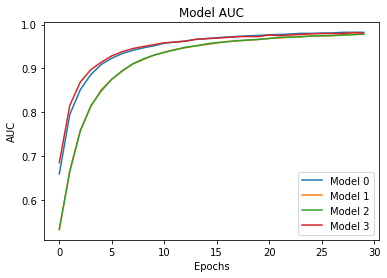

In [131]:
for i in range(len(lst1[0][0])+1):
    plt.plot(lst1[0][i][0].history['auc'],label='Model '+str(i))
    plt.legend()
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epochs')
plt.show()

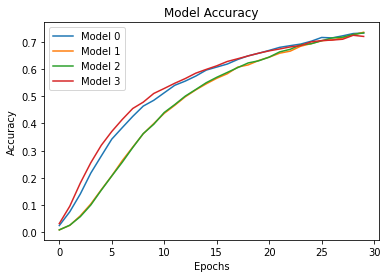

In [132]:
for i in range(len(lst1[0][0])+1):
    plt.plot(lst1[0][i][0].history['accuracy'],label='Model '+str(i))
    plt.legend()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

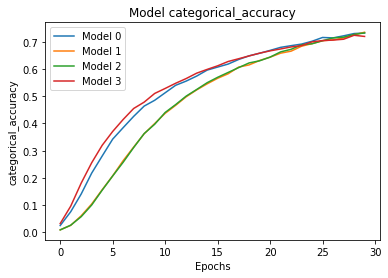

In [133]:
for i in range(len(lst1[0][0])+1):
    plt.plot(lst1[0][i][0].history['categorical_accuracy'],label='Model '+str(i))
    plt.legend()
plt.title('Model categorical_accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('Epochs')
plt.show()

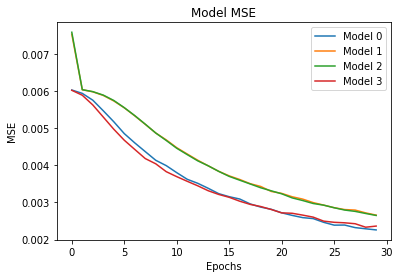

In [134]:
for i in range(len(lst1[0][0])+1):
    plt.plot(lst1[0][i][0].history['mse'],label='Model '+str(i))
    plt.legend()
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()

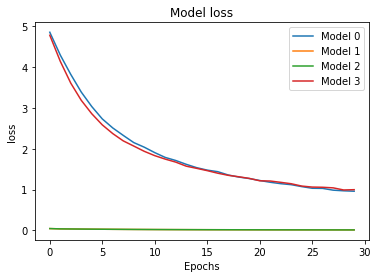

In [135]:
for i in range(len(lst1[0][0])+1):
    plt.plot(lst1[0][i][0].history['loss'],label='Model '+str(i))
    plt.legend()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.show()